In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

C:\Users\pc\AppData\Local\Temp\ipykernel_20748\2768718623.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def kmeans_custom(k, X, max_iter=300):
    centroids = initialize_centroids_kmeans_pp(k, X)
    
    for _ in range(max_iter):
        # Assign points to the nearest cluster
        labels = assign_clusters(X, centroids)

        # Update centroids
        new_centroids = np.array([np.mean(X[labels == i], axis=0) if np.sum(labels == i) > 0 else np.mean(X, axis=0) for i in range(k)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

def initialize_centroids_kmeans_pp(k, X):
    centroids = np.zeros((k, X.shape[1]))
    centroids[0] = X[np.random.choice(len(X))]
    for i in range(1, k):
        distances = np.array([min([np.linalg.norm(x - c) for c in centroids[:i]]) for x in X])
        probabilities = distances / distances.sum()
        cumulative_probabilities = probabilities.cumsum()
        centroids[i] = X[cumulative_probabilities >= np.random.rand()].min(axis=0)
    return centroids

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)


In [9]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
dfa=df[['Age',"Annual Income (k$)"]]
dfa

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [11]:
scdfa=StandardScaler()
dfa_std=scdfa.fit_transform(dfa.astype(float))
dfa_std

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033],
       [-1.20926872, -1.66266033],
       [-0.27630176, -1.62449091],
       [-1.13750203, -1.62449091],
       [ 1.80493225, -1.58632148],
       [-0.6351352 , -1.58632148],
       [ 2.02023231, -1.58632148],
       [-0.27630176, -1.58632148],
       [ 1.37433211, -1.54815205],
       [-1.06573534, -1.54815205],
       [-0.13276838, -1.54815205],
       [-1.20926872, -1.54815205],
       [-0.27630176, -1.50998262],
       [-1.3528021 , -1.50998262],
       [ 0.94373197, -1.43364376],
       [-0.27630176, -1.43364376],
       [-0.27630176, -1.39547433],
       [-0.99396865, -1.39547433],
       [ 0.51313183, -1.3573049 ],
       [-0.56336851, -1.3573049 ],
       [ 1.08726535, -1.24279661],
       [-0.70690189, -1.24279661],
       [ 0.44136514, -1.24279661],
       [-0.27630176, -1.24279661],
       [ 0.08253169,

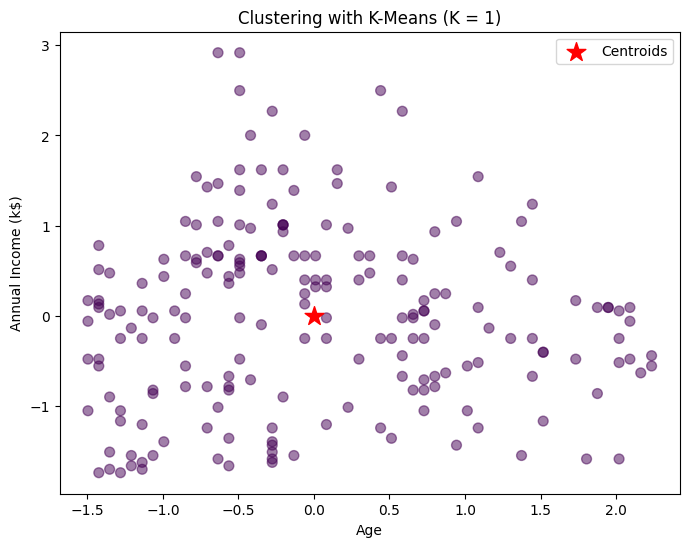

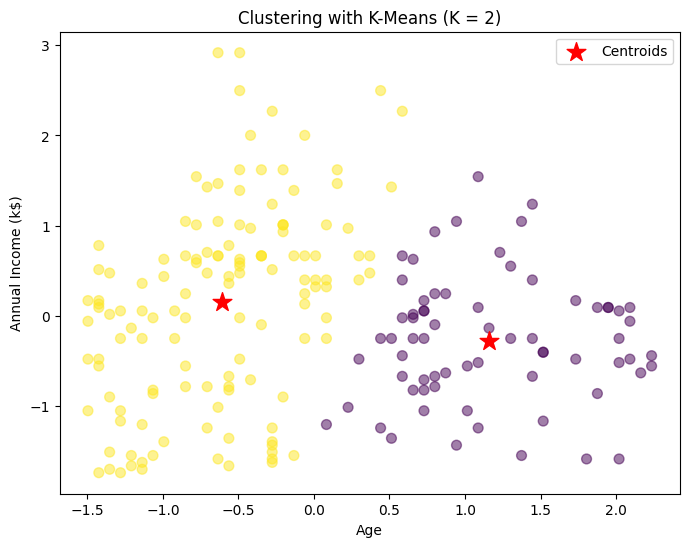

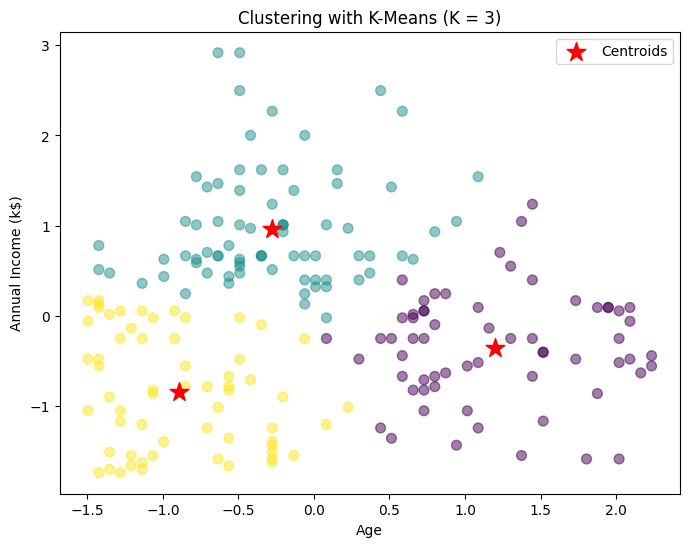

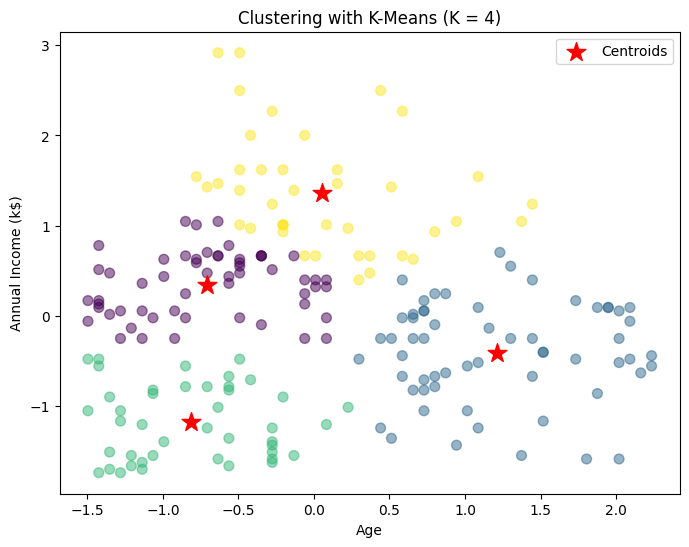

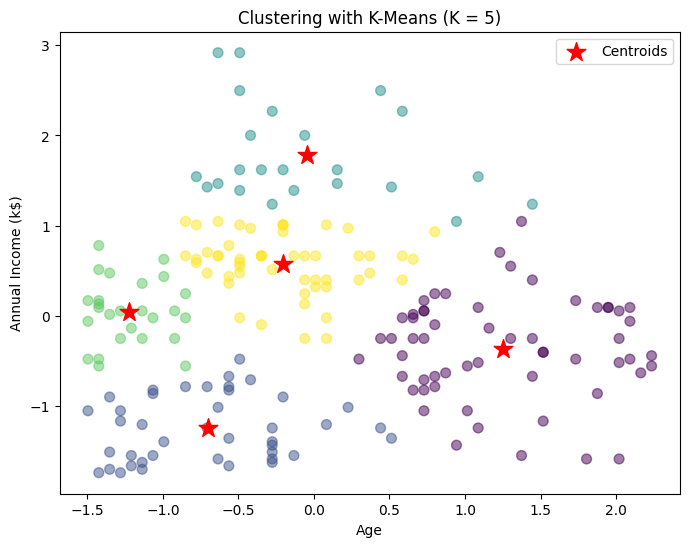

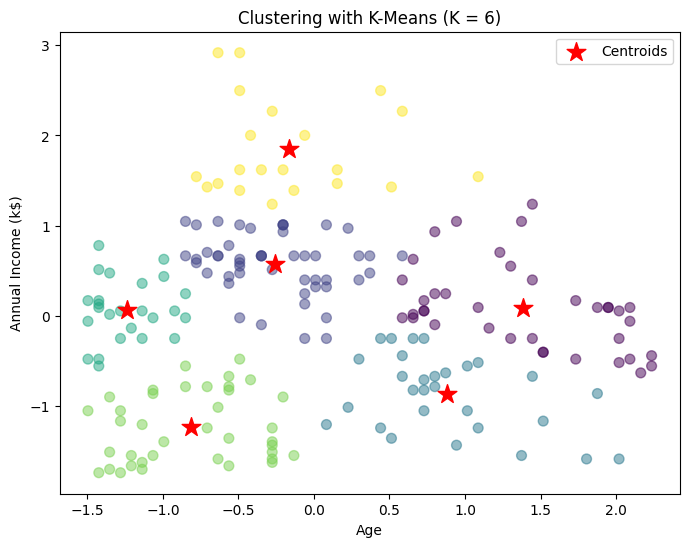

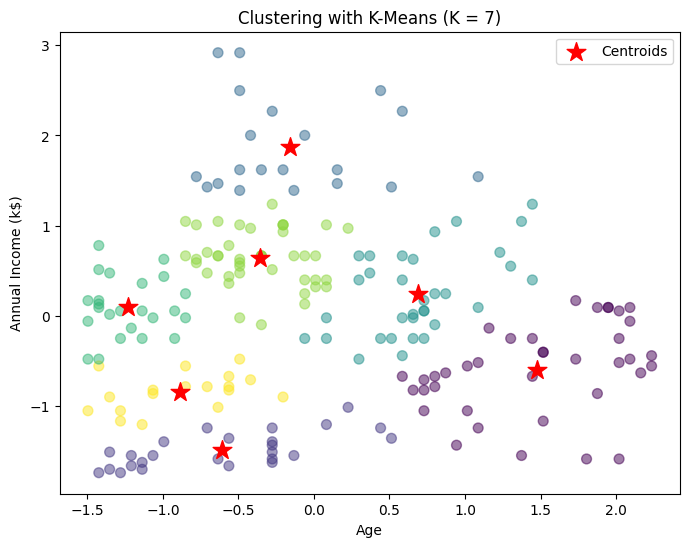

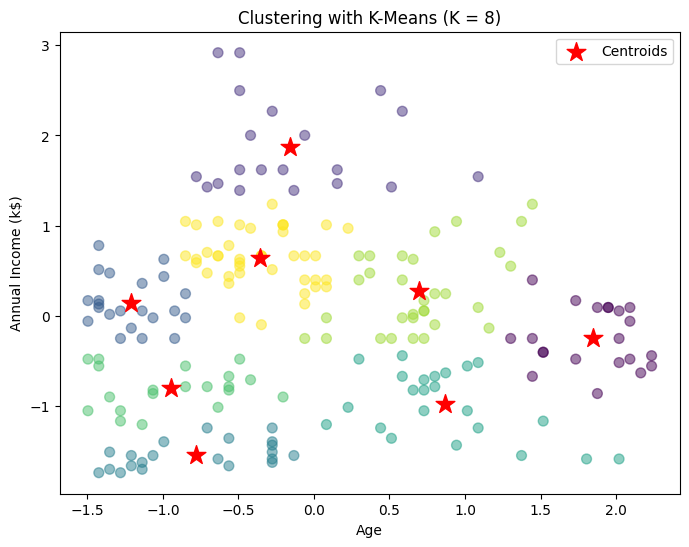

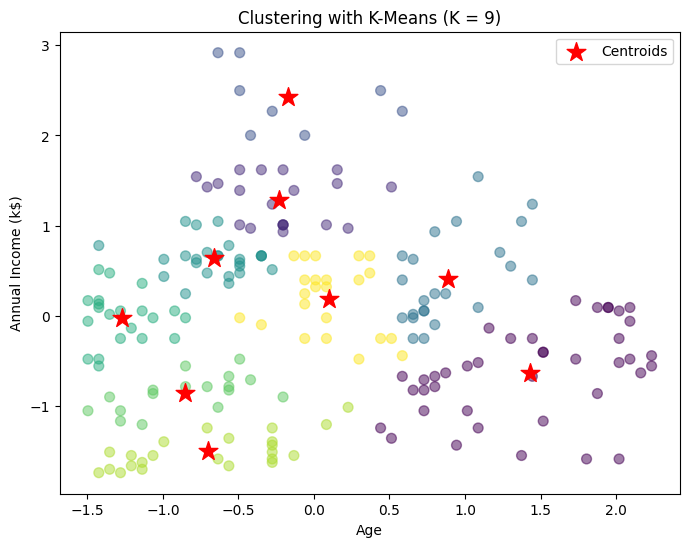

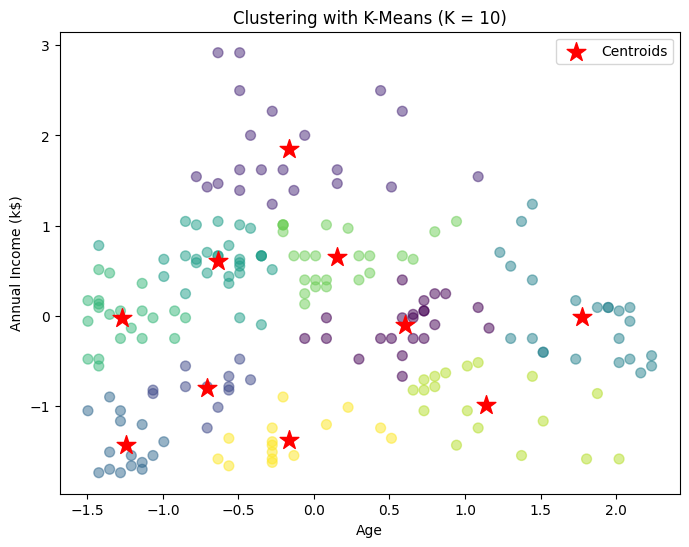

In [12]:
X = dfa_std
for k in range(1, 11):
    # Call your K-Means function
    centroids, labels = kmeans_custom(k, X)
    
    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=200, label='Centroids')
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.title(f'Clustering with K-Means (K = {k})')
    plt.legend()
    plt.show()

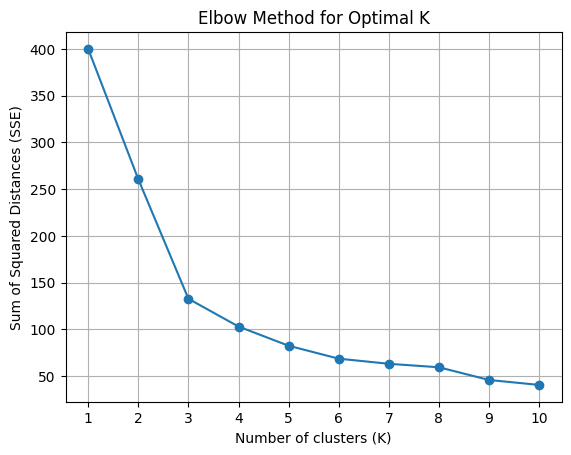

In [13]:
sse = []
for k in range(1, 11):
    centroids, labels = kmeans_custom(k, X)
    sse.append(np.sum((X - centroids[labels])**2))

# Plot the elbow graph
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

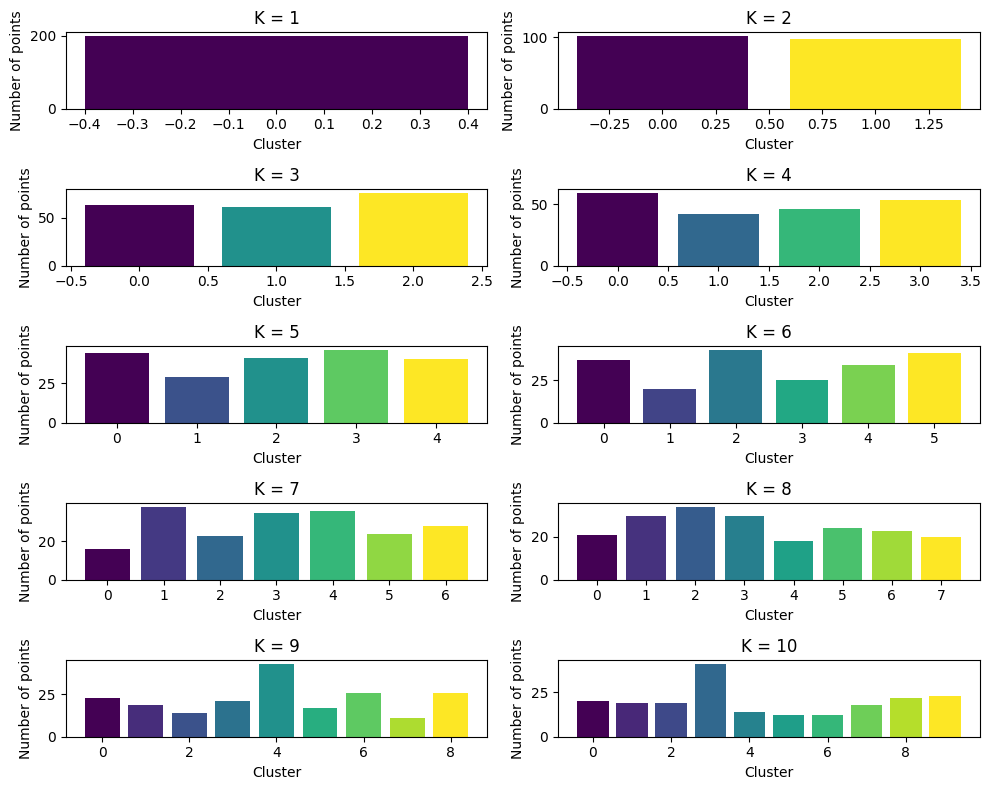

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
for k in range(1, 11):
    centroids, labels = kmeans_custom(k, X)
    plt.subplot(5, 2, k)
    cluster_counts = [np.sum(labels == i) for i in range(k)]
    plt.bar(range(k), cluster_counts, color=plt.cm.viridis(np.linspace(0, 1, k)))
    plt.xlabel('Cluster')
    plt.ylabel('Number of points')
    plt.title(f'K = {k}')

plt.tight_layout()
plt.show()